# Gradient Descent
Gradient Descent is a widely used optimization algorithm, primarily in machine learning and deep learning, for finding the minimum of a function. It's commonly employed in training models to optimize the model's parameters by minimizing the cost function (loss function).

![GD](images/gd.png)

Before diving into gradient descent, let’s review linear regression basics. You may remember the equation of a line,  y=mx+b, 
where  
m: is the slope and b the y-intercept. In linear regression, we fit a line to minimize errors between actual outputs and predictions  
y_cap often using mean squared error.

>Gradient descent operates similarly, but in a convex cost function. Starting from an initial point, we calculate the derivative to determine slope steepness, using it to update the weights and bias. The steep slope at the start gradually flattens as we approach the curve’s lowest point, or convergence.

Just as in finding the best-fit line, gradient descent aims to minimize the cost function—the gap between predicted and actual values. This process relies on two key factors: direction and learning rate, which guide partial derivative calculations through each iteration, leading closer to a local or global minimum.
- Learning Rate (or alpha) defines the size of steps toward the minimum. Usually small, it adjusts based on the cost function’s behavior. Higher learning rates take larger steps but risk overshooting, while lower rates improve precision at the cost of longer, more computation-intensive iterations.

- The cost function measures the error between actual and predicted values, guiding model adjustments to reduce error. The model iterates along the negative gradient, progressively minimizing this function until learning concludes. The term “loss function” often refers to a single example’s error, while “cost function” typically represents the average error across the dataset, providing a broader performance view.

![GD](images/gradient_descent_parameter_a.gif)

# Load data

In [1]:
import pandas as pd

In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
#storing the data into a dataframe
medical_df = pd.read_csv(medical_charges_url)
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
medical_df.shape

(1338, 7)

In [4]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Exploratory Analysis

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

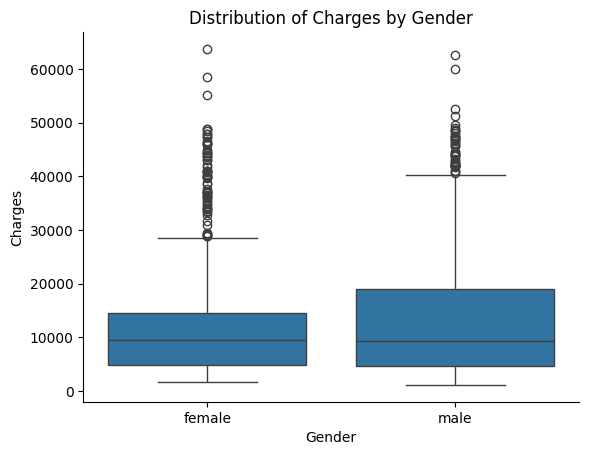

In [7]:
sns.boxplot(data=medical_df, x='sex', y='charges')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Distribution of Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()

>INTERPRETATION : From the plot above, we could see males are likely to spend more on insurance charges..

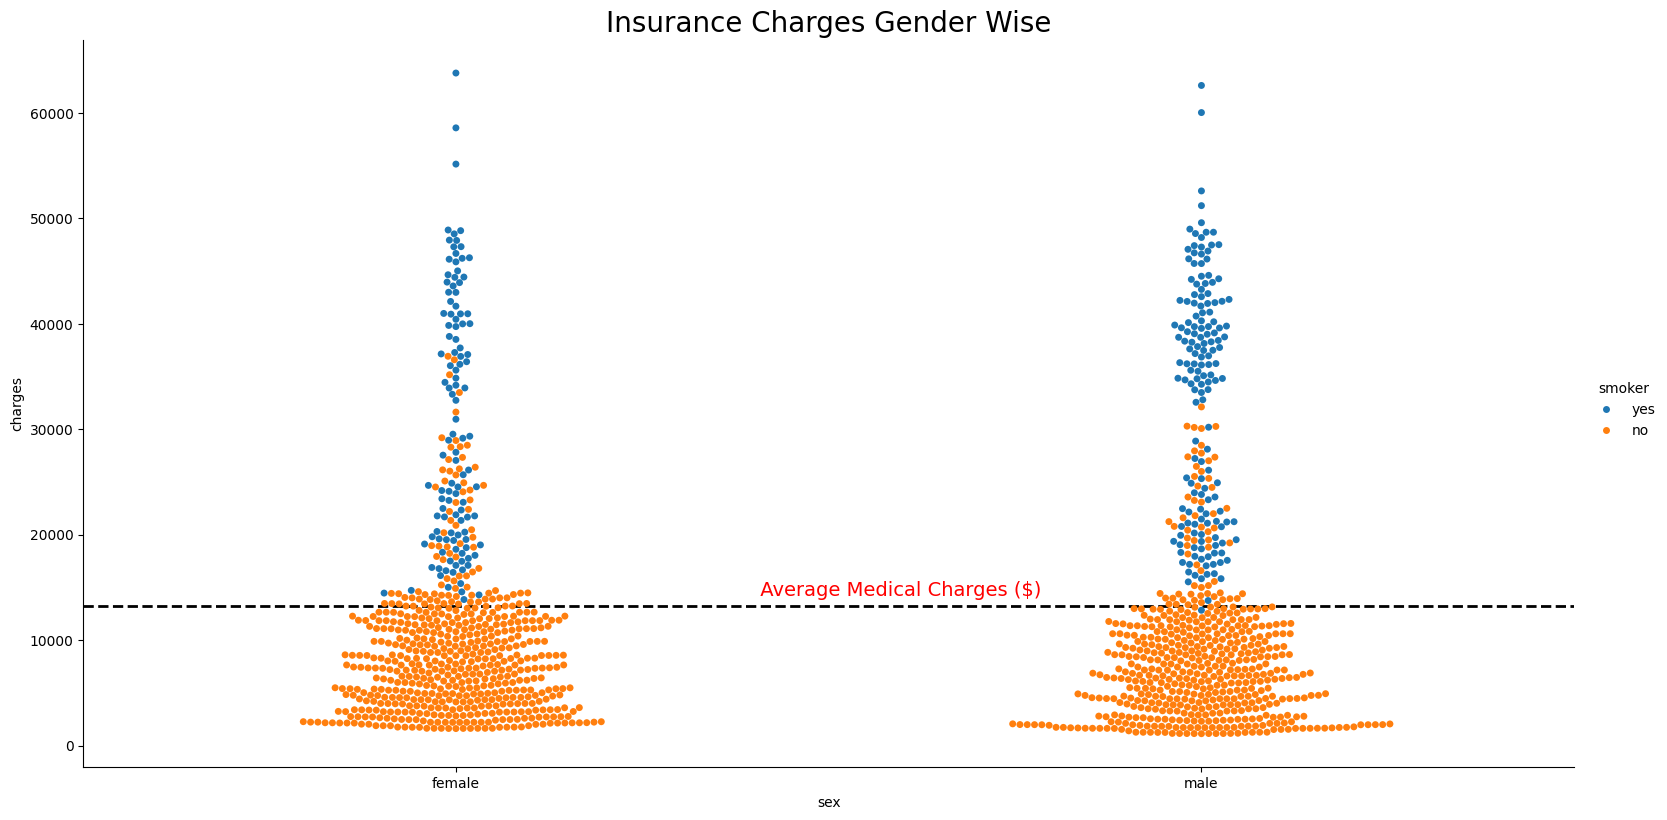

In [8]:
sns.catplot(data=medical_df,x= 'sex',y='charges', kind='swarm', hue='smoker', aspect =2, height=8)

# axhline draws horizontal line
plt.axhline(medical_df['charges'].mean(), linestyle='--', lw=2, zorder=1, color='black')
plt.annotate(f' Average Medical Charges ($)', (.4, medical_df['charges'].mean()+900), fontsize=14,color='red')
plt.title('Insurance Charges Gender Wise', fontsize=20)
plt.show()

>INTERPRETATION : From the plot above, we could see male smokers are likely to spend more on insurance charges..

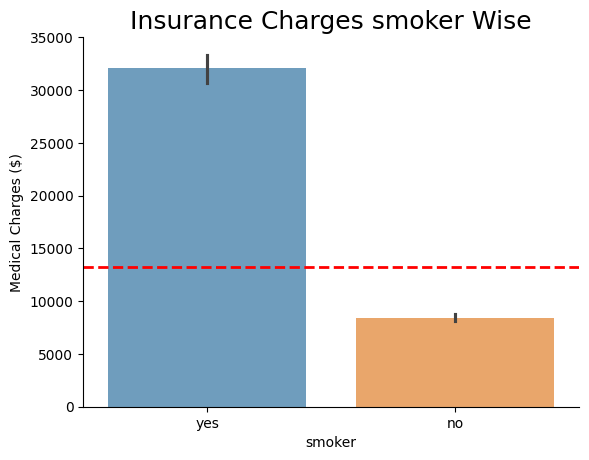

In [9]:
sns.barplot(data=medical_df,x= 'smoker',y='charges', hue='smoker', alpha=0.7, dodge=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axhline(medical_df['charges'].mean(), linestyle='--', lw=2, zorder=1, color='red')
plt.title('Insurance Charges smoker Wise', fontsize=18)
plt.ylabel('Medical Charges ($)')
plt.show()

>INTERPRETATION : Smokers end up paying more insurance charges than the ones who don't smoke.

# Data Preprocessing

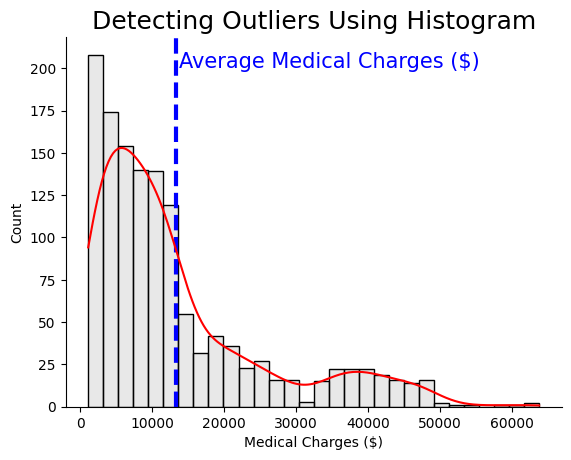

In [10]:
ax = sns.histplot(medical_df['charges'], kde=True, color='lightgray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

ax.lines[0].set_color('red')
plt.axvline(medical_df['charges'].mean(), linestyle='--', lw=3, zorder=1, color='blue') # draws vertical line
plt.annotate(f'Average Medical Charges ($)', (13700, 200), fontsize=15, color='blue')
plt.title('Detecting Outliers Using Histogram', fontsize=18)
plt.xlabel('Medical Charges ($)')
plt.show()

In [11]:
import numpy as np

In [12]:
# Extract the 'charges' column values from the medical_df DataFrame and sort them
data = sorted(medical_df['charges'].values)

# Calculate the mean and standard deviation of the sorted 'charges' data
data_mean, data_std = np.mean(data), np.std(data)

# Calculate the cutoff value, which is three times the standard deviation
cut_off = data_std * 3

# Calculate the lower and upper bounds for identifying potential outliers
lower, upper = data_mean - cut_off, data_mean + cut_off

# Print the calculated values with appropriate labels
print('Cut Off =', round(cut_off, 3))  # Display the calculated cutoff value
print('Lower =', round(lower, 3))      # Display the calculated lower bound for potential outliers
print('Upper =', round(upper, 3))      # Display the calculated upper bound for potential outliers


Cut Off = 36316.455
Lower = -23046.033
Upper = 49586.877


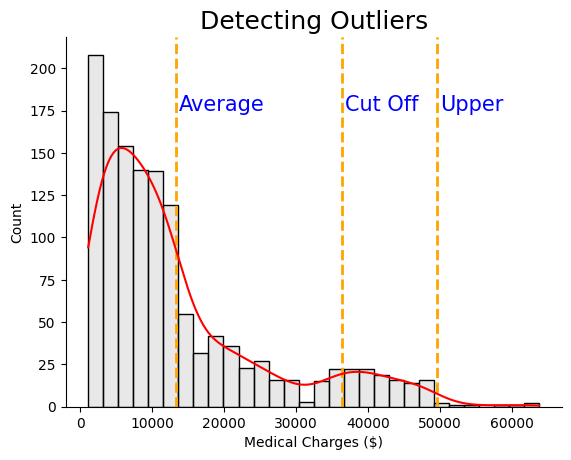

In [13]:
ax = sns.histplot(medical_df['charges'], kde=True, color='lightgray')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);
ax.lines[0].set_color('red')

plt.axvline(data_mean, linestyle='--', lw=2, zorder=1, color='orange')
plt.annotate(f'Average', (data_mean+500, 175), fontsize=15, color='blue')

plt.axvline(upper, linestyle='--', lw=2, zorder=1, color='orange')
plt.annotate(f'Upper', (upper+500, 175), fontsize=15, color='blue')

plt.axvline(cut_off, linestyle='--', lw=2, zorder=1, color='orange')
plt.annotate(f'Cut Off', (cut_off+500, 175), fontsize=15, color='blue')

plt.title('Detecting Outliers', fontsize=18)
plt.xlabel('Medical Charges ($)')
plt.show()

In [14]:
medical_df = medical_df[medical_df['charges'] < upper]
medical_df = medical_df[medical_df['charges'] > lower]
print('The shape of our dataframe after the Outlier Removal is', medical_df.shape)

The shape of our dataframe after the Outlier Removal is (1331, 7)


# Data Transformation

In [15]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
df = medical_df.copy()

## One Hot Encoding

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
df.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [20]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_cols = df.select_dtypes(include='object').columns
encoder.fit(df[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [21]:
onehot =encoder.transform(df[cat_cols])
encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [22]:
encoded_cols = [['female', 'male','smokerno', 'smokeryes', 'northeast', 'northwest', 'southeast', 'southwest']]
df[['female', 'male','smokerno', 'smokeryes', 'northeast', 'northwest', 'southeast', 'southwest']] = onehot
df.drop(cat_cols, axis=1, inplace=True )

In [23]:
df.head()

,age,bmi,children,charges,female,male,smokerno,smokeryes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [24]:
encoded_cols

[['female',
  'male',
  'smokerno',
  'smokeryes',
  'northeast',
  'northwest',
  'southeast',
  'southwest']]

In [25]:
df[encoded_cols[0]] = df[encoded_cols[0]].astype(np.uint8)

In [26]:
df.head()

,age,bmi,children,charges,female,male,smokerno,smokeryes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


## Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Extract the 'charges' column values and store them in y
y = df['charges'].values

# Drop the 'charges' column from the DataFrame to create the feature matrix X
X = df.drop('charges', axis=1).values

In [29]:
print('The shape of independent variables data is',X.shape)
print('The shape of the target variable data is',y.shape)

The shape of independent variables data is (1331, 11)
The shape of the target variable data is (1331,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Parameter update rule
$$
W_{new} = W_{old} - \eta * \frac{dL}{dW}
$$

$$
b_{new} = b_{old} - \eta * \frac{dL}{db}
$$

## Loss Function
$$
\frac{dL}{dW} = \frac{-2}{N} * \sum (y - \hat{y})
$$
>Calculate the gradient of the loss function with respect to intercept 'b'

$$
\frac{dL}{db} = \frac{-2}{N} * \sum (y - \hat{y}).X
$$

>Calculate the gradient of the loss function with respect to the slope 'm'



## Normalization

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Algorithm

In [34]:
from sklearn.metrics import r2_score

In [35]:
def regression_gradient_descent(X_train, y_train, m, b):
    # Predictions using the linear equation y = mx + b
    yhat = np.dot(X_train, m) + b

    # Mean Squared Error (MSE) calculation
    MSE = (np.sum((y_train - yhat)**2)) / N

    # R-squared calculation to measure the goodness of fit
    r_squared = r2_score(y_train, yhat)

    # Calculate the gradient of the loss function with respect to intercept 'b'
    loss_slope_b = -(2/N) * sum(y_train - yhat)

    # Calculate the gradient of the loss function with respect to the slope 'm'
    loss_slope_m = -(2/N) * (np.dot((y_train - yhat), X_train))

    # Update the slope 'm' and intercept 'b' using the gradient descent update rule
    m = m - (learning_rate * loss_slope_m)
    b = b - (learning_rate * loss_slope_b)

    return m, b, MSE, r_squared

## GC Initial Parameters

In [37]:
# Calculate the total number of data points
N = X.shape[0]

# Set the initial learning rate, decay rate, and other variables
# decay_rate = 0.01
learning_rate = 0.2 # this is Eta
m = np.ones(X.shape[1])  # Initializing some initial values for the slope
b = 1  # Initializing some initial values for the intercept
print('The initial Value of w and b are', m, b)

The initial Value of w and b are [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1


In [38]:
LR = []  # List to store learning rates
ValidationLoss = []  # List to store validation loss
Trainingloss = []  # List to store training loss
# Initialize the intercept and slope
Intercept = []
Slope = []

In [39]:
num_epochs =  2000
EARlY_STOP_THRESHOLD = 1e-6

## Training GC

In [40]:
for i in range(num_epochs):
    epoch = i

    # Adjust learning rate with decay if applicable
    # if i > 0:
    #     learning_rate *= 1 / (1 + decay_rate)
    
    # Perform gradient descent on the entire dataset
    m, b, MSE, r_squared = regression_gradient_descent(X_train_scaled, y_train, m, b)
    m_test, b_test, MSE_test, r_squared_test = regression_gradient_descent(X_test_scaled, y_test, m, b)

    # Store values for analysis and tracking
    Intercept.append(b)
    Slope.append(m)
    Trainingloss.append(MSE)
    ValidationLoss.append(MSE_test)
    LR.append(learning_rate)
    
    # Print progress every 100 epochs
    if i % 100 == 0:
        print(f'Epoch: {i}/{num_epochs} [==============================] - Loss: {MSE:.2e} - val Loss: {MSE_test:.2e} - r-squared: {round(r_squared, 4)} - val_r-squared: {round(r_squared_test, 4)}')

    # Early Stopping Mechanism
    if len(ValidationLoss) > 1 and ValidationLoss[-2] - ValidationLoss[-1] < EARlY_STOP_THRESHOLD:
        print(f'\n -- Early Stopping at Epoch : {i} val_loss : {np.around(ValidationLoss[-1], 5)} --')
        break

Epoch: 0/2000 [==============================] - Loss: 2.35e+08 - val Loss: 3.27e+07 - r-squared: -1.2464 - val_r-squared: -0.0281
Epoch: 100/2000 [==============================] - Loss: 2.71e+07 - val Loss: 7.50e+06 - r-squared: 0.7414 - val_r-squared: 0.7645
Epoch: 200/2000 [==============================] - Loss: 2.68e+07 - val Loss: 7.31e+06 - r-squared: 0.7437 - val_r-squared: 0.7705
Epoch: 300/2000 [==============================] - Loss: 2.68e+07 - val Loss: 7.23e+06 - r-squared: 0.7441 - val_r-squared: 0.7731
Epoch: 400/2000 [==============================] - Loss: 2.68e+07 - val Loss: 7.19e+06 - r-squared: 0.7443 - val_r-squared: 0.7742
Epoch: 500/2000 [==============================] - Loss: 2.68e+07 - val Loss: 7.17e+06 - r-squared: 0.7443 - val_r-squared: 0.7748
Epoch: 600/2000 [==============================] - Loss: 2.68e+07 - val Loss: 7.16e+06 - r-squared: 0.7443 - val_r-squared: 0.7751
Epoch: 700/2000 [==============================] - Loss: 2.68e+07 - val Loss: 7.16e

In [41]:
y_pred[1]

NameError: name 'y_pred' is not defined

In [42]:
# Get the coefficient (slope) and intercept values for the current epoch
coefficient = Slope[epoch]
intercept = Intercept[epoch]

# Predictions using the linear regression equation y = mx + b
y_pred = np.dot(X_test_scaled, coefficient) + intercept

# Create a DataFrame to compare predicted and actual values
df = pd.DataFrame({'y': y_test, 'y_pred': y_pred})
df.head()

,y,y_pred
0,11534.87265,9479.182961
1,3693.42800,9684.362226
2,3238.43570,7442.888764
3,38746.35510,31789.558831
4,4058.71245,6830.407059


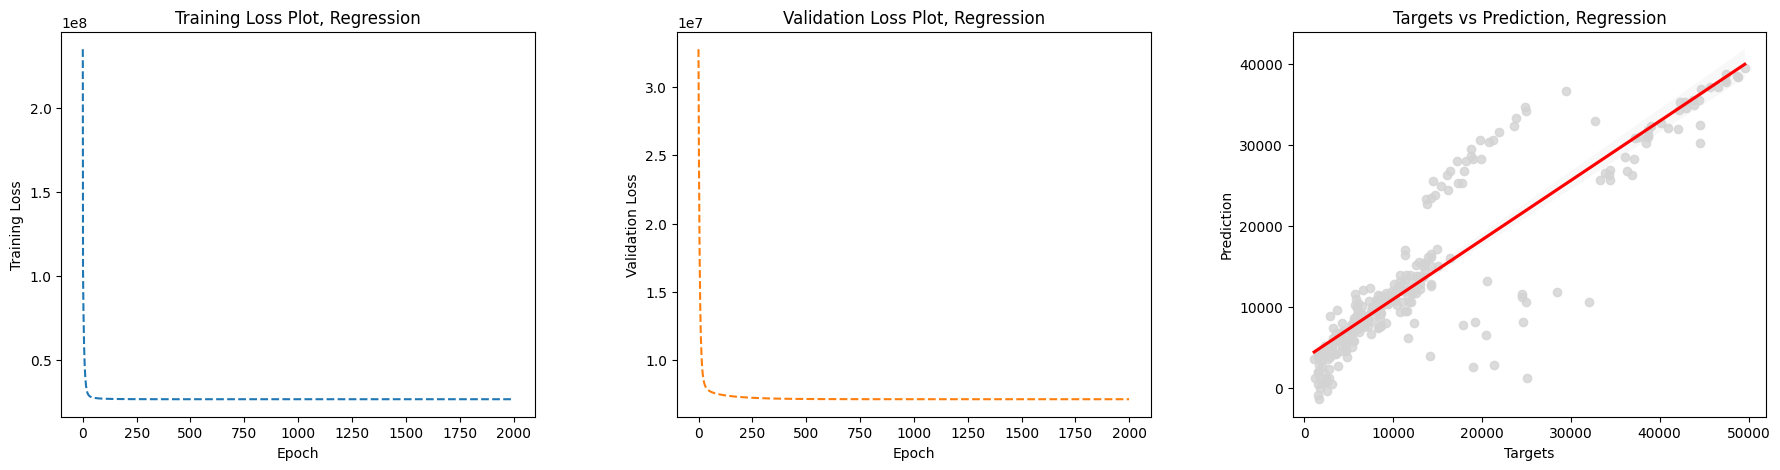

In [43]:
# Plotting the Figures
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22, 5))
fig.subplots_adjust(hspace=.2, wspace=.3)

# First Plot: Training Loss Plot
ax1.plot(Trainingloss, linestyle='--')
ax1.set_title("Training Loss Plot, Regression")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Loss')

# Second Plot: Validation Loss Plot
ax2.plot(ValidationLoss, 'tab:orange', linestyle='dashed', markersize=5)
ax2.set_title("Validation Loss Plot, Regression")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Validation Loss')

# Third Plot: Scatter Plot of Targets vs. Predictions
ax3 = sns.regplot(data=df, x=df['y'], y=df['y_pred'], color='lightgray', fit_reg=True)
ax3.lines[0].set_color('red')
ax3.set_title('Targets vs Prediction, Regression')
ax3.set_xlabel('Targets')
ax3.set_ylabel('Prediction')

# Display the plots
plt.show()